In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

In [20]:
Zoo=pd.read_csv("zoo.csv")

In [21]:
Zoo.head(20)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [52]:
# Join animal table and class table to show actual class names
ani_class = pd.read_csv('class.csv')
df = pd.merge(Zoo,ani_class,how='left',left_on='type',right_on='Class_Number')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


# Data Prepocessing
Evaluate the missing values and duplicates

Set the features and target

Check data type

Train-Test-Split

In [22]:
Zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


array([[<AxesSubplot:xlabel='hair', ylabel='hair'>,
        <AxesSubplot:xlabel='feathers', ylabel='hair'>,
        <AxesSubplot:xlabel='eggs', ylabel='hair'>,
        <AxesSubplot:xlabel='milk', ylabel='hair'>,
        <AxesSubplot:xlabel='airborne', ylabel='hair'>,
        <AxesSubplot:xlabel='aquatic', ylabel='hair'>],
       [<AxesSubplot:xlabel='hair', ylabel='feathers'>,
        <AxesSubplot:xlabel='feathers', ylabel='feathers'>,
        <AxesSubplot:xlabel='eggs', ylabel='feathers'>,
        <AxesSubplot:xlabel='milk', ylabel='feathers'>,
        <AxesSubplot:xlabel='airborne', ylabel='feathers'>,
        <AxesSubplot:xlabel='aquatic', ylabel='feathers'>],
       [<AxesSubplot:xlabel='hair', ylabel='eggs'>,
        <AxesSubplot:xlabel='feathers', ylabel='eggs'>,
        <AxesSubplot:xlabel='eggs', ylabel='eggs'>,
        <AxesSubplot:xlabel='milk', ylabel='eggs'>,
        <AxesSubplot:xlabel='airborne', ylabel='eggs'>,
        <AxesSubplot:xlabel='aquatic', ylabel='eggs'>],
    

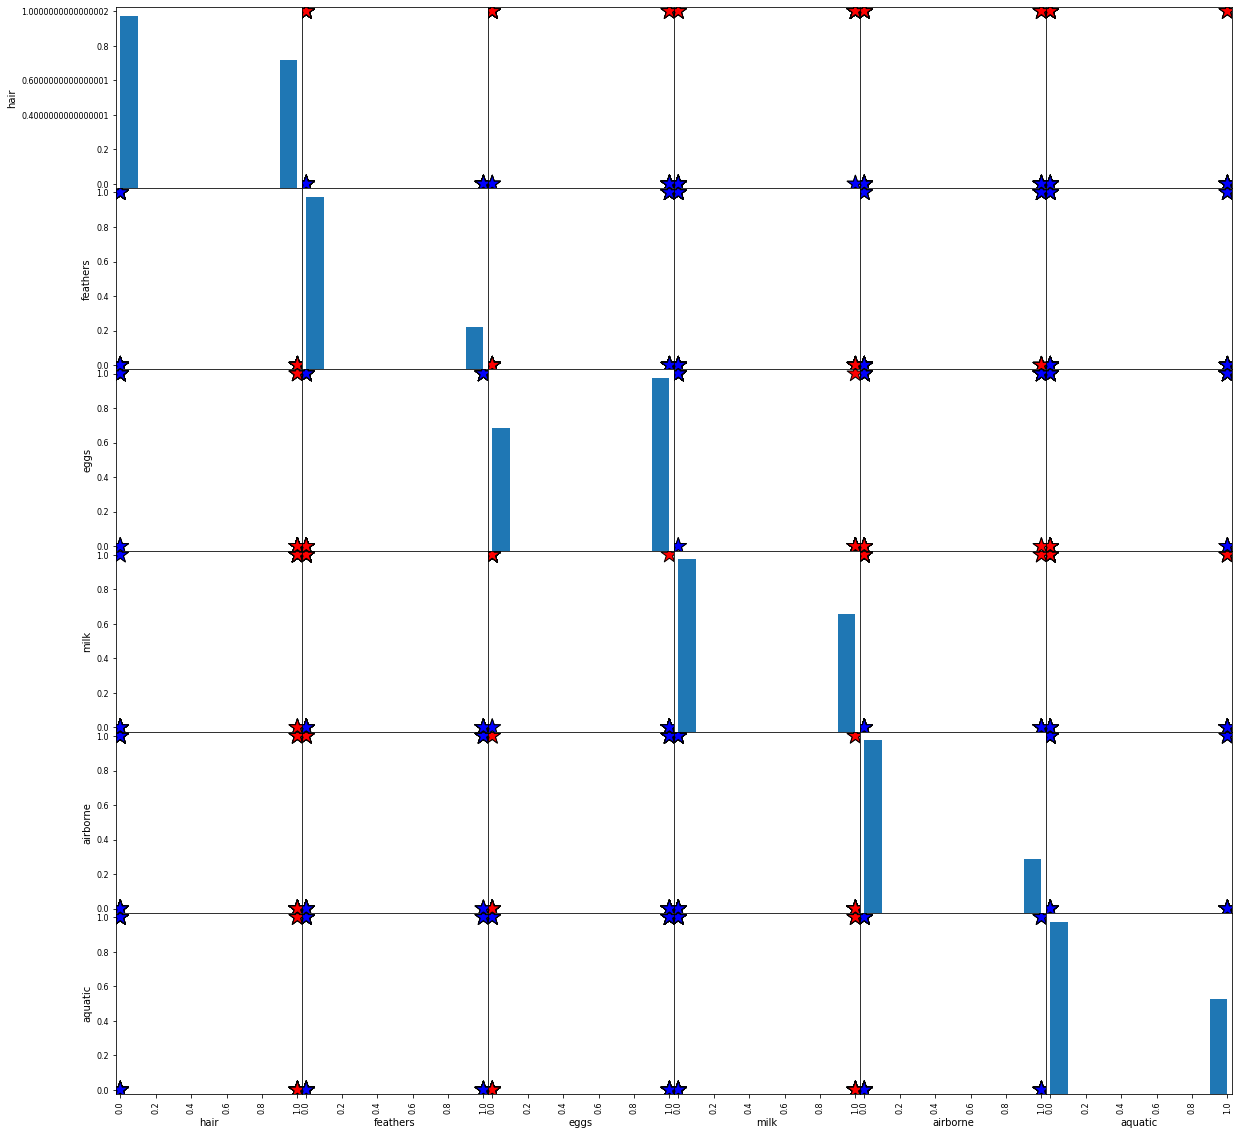

In [43]:
color_list = [("red" if i ==1 else "blue" if i ==0 else "yellow" ) for i in Zoo.hair]
unique_list = list(set(color_list))
unique_list
pd.plotting.scatter_matrix(Zoo.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '*',
                                       edgecolor= "black")

C:\Users\pcs\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pcs\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


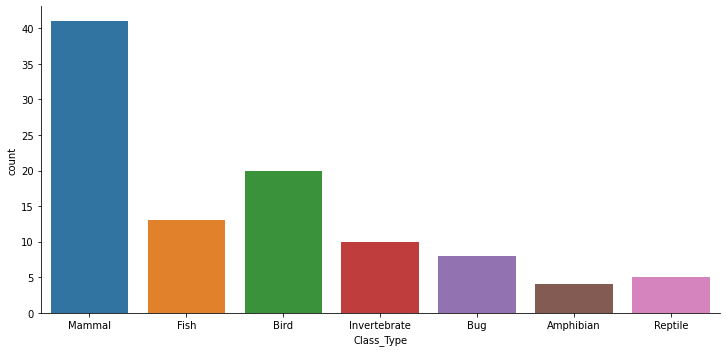

In [58]:
#use seaborn to plot the number of each class_type
sns.factorplot('Class_Type', data=df, kind="count",size = 5,aspect = 2)

In [59]:

#check if there is null value
Zoo.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [60]:
duplicates = Zoo.duplicated()
duplicates[duplicates > 1]

Series([], dtype: bool)

In [61]:
#check if there are duplicates in animal_name
duplicates = Zoo.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

In [23]:
#train test split into 80/20
from sklearn.model_selection import train_test_split
X = Zoo.iloc[:,1:17]
y = Zoo.iloc[:,17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# 3. Training and testing the data
Decision Tree

Random Forest

Perceptron

Support Vector Machine

K-Nearest Neighbors

# Decision Tree

In [24]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Declare and train the model
clf = DecisionTreeClassifier(random_state = 0,criterion='gini')
clf.fit(X_train, y_train)

y_pred_DecisionTreeClassifier = clf.predict(X_test)

scores = []
score = accuracy_score(y_pred_DecisionTreeClassifier,y_test)
a=scores.append(score)

In [25]:
#use cross validation score since this is a small size dataset 
from sklearn.model_selection import cross_val_score
score_tree=cross_val_score(clf, X,y, cv=10)
score_tree

C:\Users\pcs\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([1. , 1. , 1. , 1. , 0.9, 0.9, 0.8, 1. , 1. , 1. ])

In [26]:

cv_scores = []
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (score_tree.mean(), score_tree.std() * 2))
cv_score = score_tree.mean()
cv_scores.append(cv_score)

Decision Tree Accuracy: 0.96 (+/- 0.13)


# 2) Random Forest Classifier

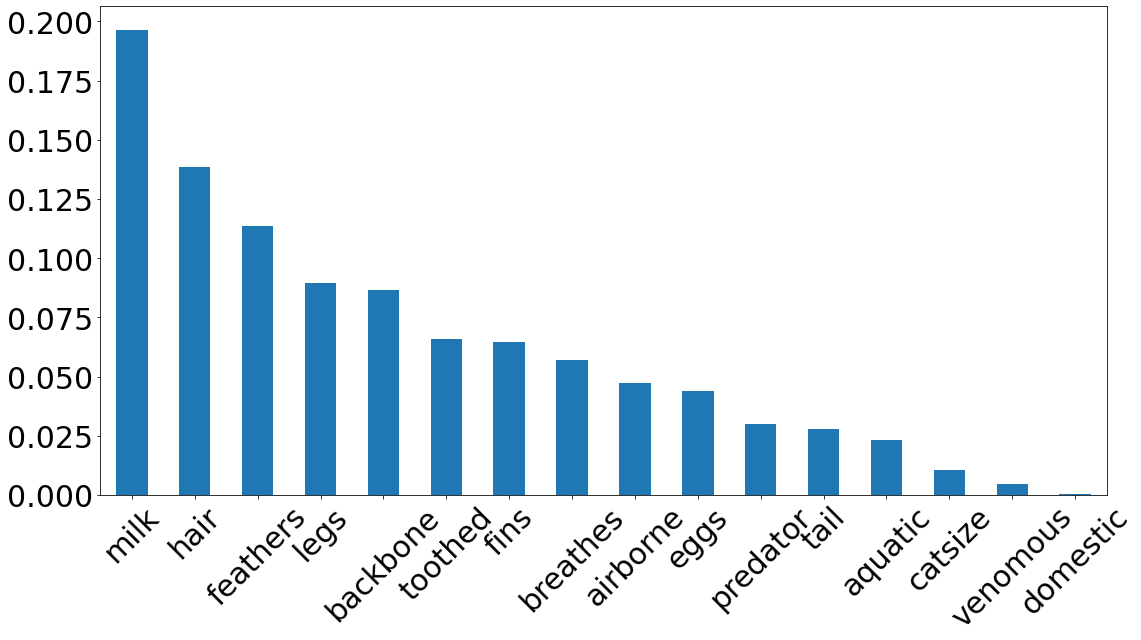

In [27]:
from sklearn.ensemble import RandomForestClassifier


# Declare and train the model
clf = RandomForestClassifier(random_state = 0,n_estimators=25, n_jobs = 2)
clf.fit(X_train, y_train)
y_pred_RandomForestClassifier = clf.predict(X_test)
#Get Accuracy Score
score = accuracy_score(y_pred_RandomForestClassifier,y_test)
scores.append(score)

global importances
# Get the feature importances
importances = []
importances = clf.feature_importances_


# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()


In [28]:
#Get cross validation score of random forest model
score_forest=cross_val_score(clf, X,y, cv=10)
score_forest
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (score_forest.mean(), score_forest.std() * 2))
cv_score = score_forest.mean()
cv_scores.append(cv_score)

C:\Users\pcs\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Random Forest Accuracy: 0.97 (+/- 0.09)


# Perceptron

In [29]:
from sklearn.linear_model import Perceptron

# Declare the model
clf = Perceptron(tol=1e-3, eta0=0.1, random_state=0)

# Train the model
clf.fit(X_train, y_train)
y_pred_Perceptron = clf.predict(X_test)
#Get Accuracy Score
score = accuracy_score(y_pred_Perceptron,y_test)
scores.append(score)

In [30]:
#Get cross validation score of Perceptron
score_perceptron=cross_val_score(clf, X,y, cv=10)
score_perceptron
print("Perceptron Accuracy: %0.2f (+/- %0.2f)" % (score_perceptron.mean(), score_perceptron.std() * 2))
cv_score = score_perceptron.mean()
cv_scores.append(cv_score)

Perceptron Accuracy: 0.93 (+/- 0.09)


C:\Users\pcs\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


# 4) Support Vector Machine

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Declare the model
svm = SVC(kernel='linear', C=0.2, random_state=0)

# Train the model
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

#Get Accuracy Score
score = accuracy_score(y_pred_svm,y_test)
scores.append(score)

In [32]:
#Get cross validation score of Support Vector Machine
score_svm=cross_val_score(svm, X,y, cv=10)
print("Support Vector Machine Accuracy: %0.2f (+/- %0.2f)" % (score_svm.mean(), score_svm.std() * 2))
cv_score = score_svm.mean()
cv_scores.append(cv_score)

Support Vector Machine Accuracy: 0.96 (+/- 0.10)


C:\Users\pcs\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


# K-Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
# Declare the model
clf = KNeighborsClassifier(n_neighbors=5)

# Train the model
clf.fit(X_train, y_train)
y_pred_KNeighborsClassifier = clf.predict(X_test)
#Get Accuracy Score
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)

In [45]:
#Get cross validation score of K-Nearest Neighbors
score_knn=cross_val_score(clf, X,y, cv=10)
print(" K-Nearest Neighbors Accuracy: %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2))
cv_score = score_knn.mean()
cv_scores.append(cv_score)

 K-Nearest Neighbors Accuracy: 0.89 (+/- 0.14)


C:\Users\pcs\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"



#  Accuracy Score

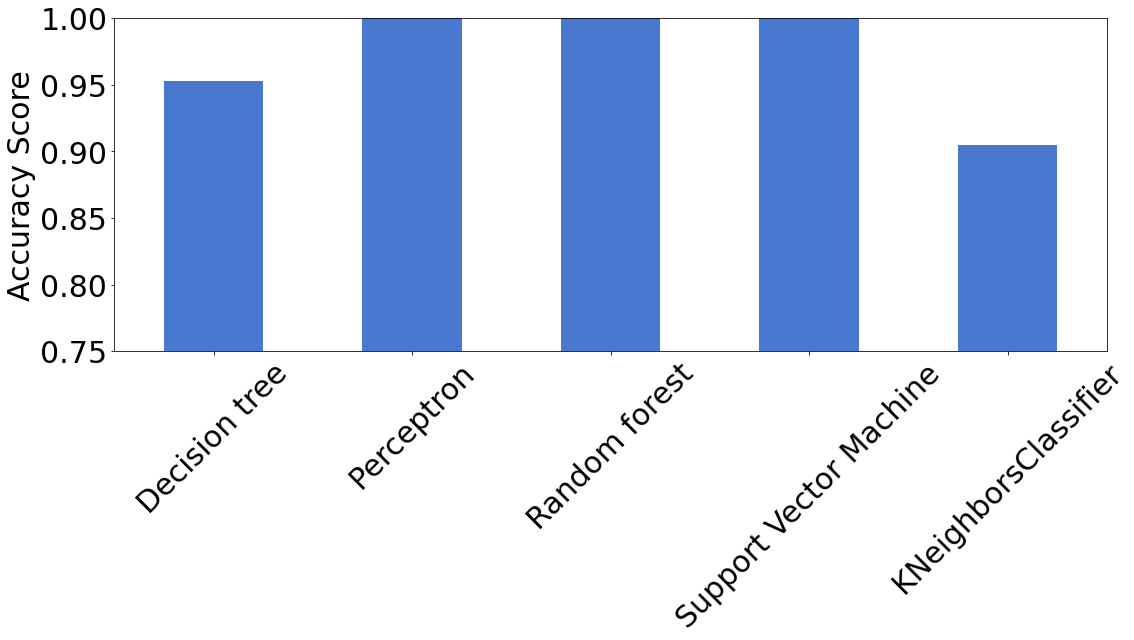

In [39]:
# Convert the Accuracy Scores into one-dimensional 1darray with corresponding classifier names as axis labels

Acc_scores = pd.Series(scores, ['Decision tree','Perceptron', 'Random forest','Support Vector Machine',
                                  'KNeighborsClassifier'])

current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
colors = np.random.randint(0,5,5)

# Make the bar Plot from f_importances 
Acc_scores.plot(x='Classifiers', y='Accuracy scores',kind = 'bar',figsize=(16,9), rot=45, fontsize=30, colormap=cmap)
#plt.bar(fscores,clfs)
plt.xlabel('', fontsize=30)
plt.ylabel('Accuracy Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()


# Cross Validation Score

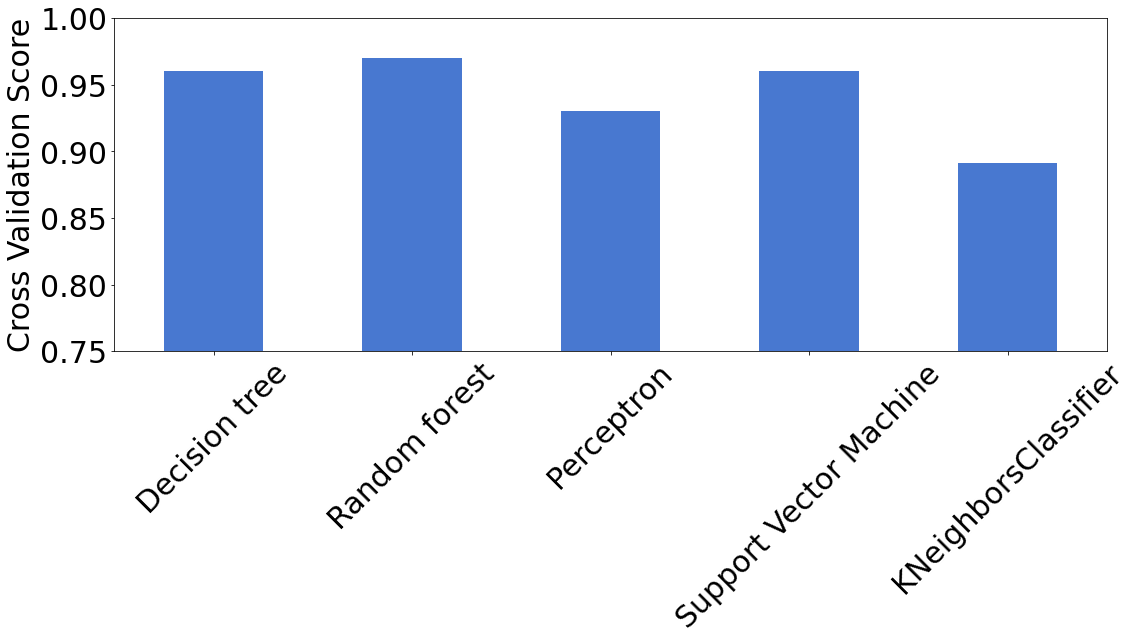

In [40]:
# Convert the Cross Validation scores into one-dimensional 1darray with corresponding classifier names as axis labels

clf_scores = pd.Series(cv_scores, ['Decision tree', 'Random forest','Perceptron','Support Vector Machine',
                                  'KNeighborsClassifier'])

current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
#colors = np.random.randint(0,5,5)

# Make the bar Plot from f_importances 
clf_scores.plot(x='Classifiers', y='Cross Validation scores',kind = 'bar',figsize=(16,9), 
                rot=45, fontsize=30, colormap=cmap)
#plt.bar(fscores,clfs)
plt.xlabel('', fontsize=30)
plt.ylabel('Cross Validation Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()


# In order to truly apply animal classification, I used a few machine learning models to do classifications and then perform a battle to see which model has the best accuracy score. Here used Decision tree, Random Forest, K-Nearest Neighbors, Support Vector Machine and Perceptron models.

# conclusion:- As i got  K-Nearest Neighbors Accuracy:0.14 accuracy score and 0.89 of cross validation.
wins with a 1.0 accuracy score and 0.96 of cross validation.